##  Spanning tree

* 그래프의 속성은 갖지만, 사이클이 없다

## 최소신장트리 Mininum Spanning Tree, MST

* 가능한 Spanning tree에서 간선의 가중치 합이 최소인 Spanning Tree를 말한다.
* 정리 : 무방향 그래프에서 모든 노드에 간선이 존재하지만, 사이클은 없어야하고, 그 간선들의 합이 최소여야한다.

* 대표적인 최소신장트리알고리즘
    * kruskal's 알고리즘, prim's 알고리즘

# Kruskal 알고리즘

1. 모든 노드들을 독립적으로 세팅한다.
2. 그리디 알고리즘을 기반으로, 제일 작은 가중치를 가지는 간선을 연결한다.
3. 최상위 노드를 확인하고, 다를 경우 연결한다. ( 같을경우는 사이클이 생긴다.)


# Union-Find 알고리즘

* 집합안의 부분집합에서 요소들끼리 겹치는 것이 있는지 판별하는 알고리즘이다. -> 사이클 여부를 판별한다.

1. 초기화 : 처음에 노드를 개별 집합으로 초기화
2. 집합화 : 개별 집합을 하나의 집합으로 합친다, 두 트리를 하나의 트리로 합친다.
3. 각 그룹 최상단의 노드가 같은지 판별한다. 그럼, 두 노드가 같은 부분집합에 있는지 확인이 가능하다.

    ## Union by rank기법

    * 두 트리에 대한 높이(혹은 깊이)를 기억한다. rank의 개념.

    ### 두 트리의 높이가 다르면, 높이가 작은 트리를 큰 트리와 연결한다.(큰 트리의 루트가 합집합의 루트)

    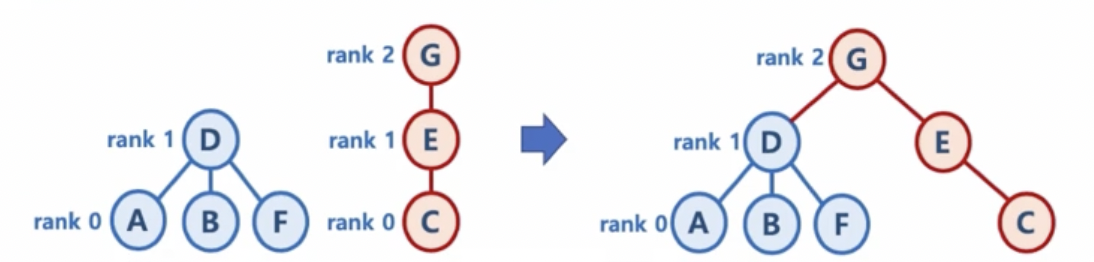

    ### 높이가 다른 경우, 임의의 한 트리 높이를 1증가 시키고, 연결한다.
    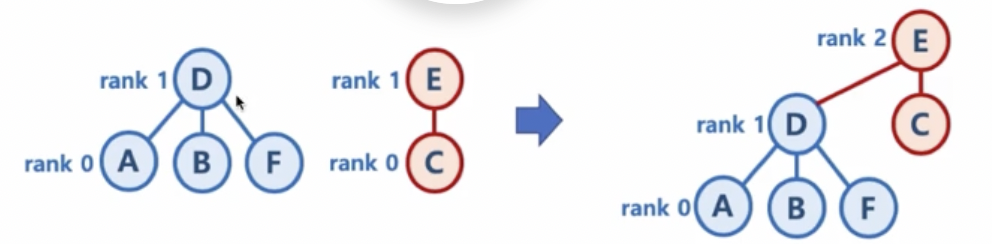


   ### 시간복잡도는 O(log N)

   * 초기화시, 모든 원소는 높이가 0, rank ==0
    * 합치는 과정에서 union by rank가 사용
        * 높이가 h인 트리를 만들려면, h-1높이의 두 트리가 합쳐진다.
            * 높이가 h-1인 트리가 n개의 원소를 필요로 할때, 높이 h인 트리는 최소!! 2n개 필요함

    ## Path compression 기법

    ### Find를 실행한 노드를 루트에 바로 연결하여, 한번에 알 수 있게한다.
    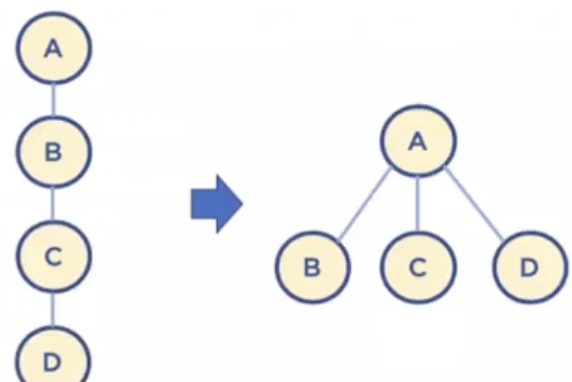

    * 트리 연결과정에서 노드의 연결이 링크드리스트형식으로 변질 될 수 있는데 그럼, O(MlogN)이라 매우 높은 시간복잡도를 가진다

    * find와 union 시 이 2가지 기법이 사용되면 O(1)를 가지게 된다

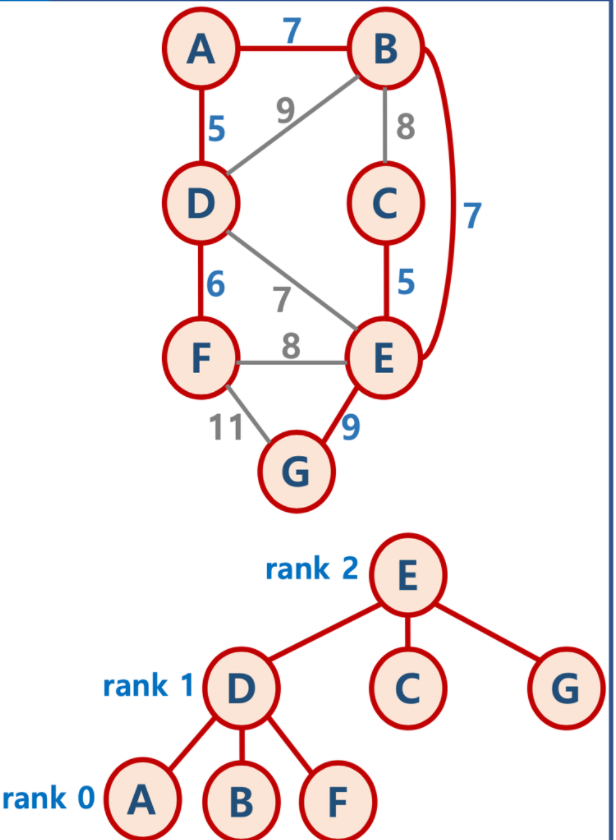

In [1]:
mygraph = {
    'vertices': ['A', 'B', 'C', 'D', 'E', 'F', 'G'],
    'edges': [
        (7, 'A', 'B'),
        (5, 'A', 'D'),
        (7, 'B', 'A'),
        (8, 'B', 'C'),
        (9, 'B', 'D'),
        (7, 'B', 'E'),
        (8, 'C', 'B'),
        (5, 'C', 'E'),
        (5, 'D', 'A'),
        (9, 'D', 'B'),
        (7, 'D', 'E'),
        (6, 'D', 'F'),
        (7, 'E', 'B'),
        (5, 'E', 'C'),
        (7, 'E', 'D'),
        (8, 'E', 'F'),
        (9, 'E', 'G'),
        (6, 'F', 'D'),
        (8, 'F', 'E'),
        (11, 'F', 'G'),
        (9, 'G', 'E'),
        (11, 'G', 'F')
    ]
}

In [2]:
#부모노드 저장
parent = dict()
#트리의 rank, 해당노드의 rank값저장
rank = dict()

# 4. 자신의 노드가 자신의 부모노드가 아니다 => 루트노드가 아니다, 또 루트노드가있다.
def find(node):
    # path compression 최상단_부모노드 찾기
    if parent[node] != node:
        parent[node] = find(parent[node])
    # 재귀호출로 만든다. 스택의 개념을 생각하자.해당 노드가 부모노드를 반환하는 함수인데
    # 부모노드가 아니라는 조건하에 반복되어 부모노드를 반환하는 것이다. 바로 부모노드를 찾는다(반환한다)! =>path compression
    return parent[node]
                  
# 5. union by rank 기법 두 부분집합의 최상단node의 rank를 확인하고 연결한다.

def union(node_v, node_u):
    root1 = find(node_v)
    root2 = find(node_u)
                  
    if rank[root1] > rank[root2]:
        parent[root2] = root1
    else:
        parent[root1] = root2
                  
        #둘다 rank가 동일하면 아무거나 랭크를하나 올려준다.
        if rank[root1] == rank[root2]:
            rank[root2] += 1



#초기화 함수
def make_set(node):
    parent[node] = node
    rank[node] = 0
        

def kruskal(graph):
    #간선의 리스트, 최종적으로 알고싶은것!
    mst = list()
    
    # 1.초기화
    for node in graph['vertices']:
        make_set(node)
    
    
    # 2. 간선기반sorting - egde들을 작은것부터 찾아야하기 때문.
    edges = graph['edges']
    edges.sort()
    
    # 3. 간선연결 - 맨 작은 간선부터 하나씩 살펴본다.
    for edge in edges:
        weight, node_v, node_u = edge
        
        # node_v의 루트노드와 node_u 루트노드가 같은지 비교한다.
        # 다르다면 사이클이 없으니 union 해줘야한다. 같다면 pass
        if find(node_v)!=find(node_u):
            union(node_v, node_u)
            mst.append(edge)
    return mst

In [3]:
kruskal(mygraph)

[(5, 'A', 'D'),
 (5, 'C', 'E'),
 (6, 'D', 'F'),
 (7, 'A', 'B'),
 (7, 'B', 'E'),
 (9, 'E', 'G')]

### 시간복잡도

* kruskal => 전체 총 시간복잡도는 O(간선수log간선수), 즉 O(nlogn)

    * 자체적으로 sort 과정에서의 시간복잡도가 eloge (e:간선수) 이고 이제 제일크기 때문이다.
    * union-find 와 pathcompression은 상수의 시간복잡도를 갖을만큼 빠르다. O(1)

# Prim's 알고리즘

### 시간 복잡도 O(간선수log간선수), 즉 O(nlogn)
 
* kruskal - prim 둘다 greedy 를 기초로 하여 최소부터 찾아나가는 알고리즘이다.
    * kruskal 은 가장 가중치가 작은 것부터 선택하면서 최소신장트리를 구한다.
    * prim은 특정 노드에서 시작해, 해당 노드가 가장 작은 가중치를 가지는 간선을 선택해 나간다.
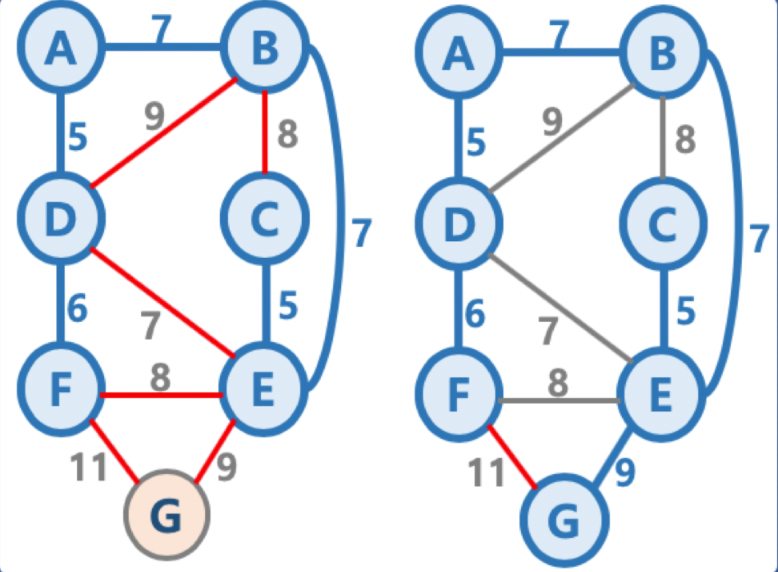
    
### 연결된 노드를 최소신장트리 집합에 넣어준다

* 연결되어있는 노드를 저장하는 집합생성 = []
1. 임의의 첫 노드를 지정하고, 연결되어있는 간선을 확인한다.
2. 제일 작은 가중치를 갖는 간선을 선택한다.
3. 만약 작은 가중치의 간선의 노드가 연결노드집합에 들어있다면, 그 다음(반복)노드를 연결한다.

### heapq (heapify) 와 defaultdict 연습

In [4]:
import heapq

queue = []
test = [[2,'A'],[5,'B'],[3,'C']]

for edge in test:
    heapq.heappush(queue,edge)
    
for idx in range(len(queue)):
    print(queue)
    print(heapq.heappop(queue))
    



[[2, 'A'], [5, 'B'], [3, 'C']]
[2, 'A']
[[3, 'C'], [5, 'B']]
[3, 'C']
[[5, 'B']]
[5, 'B']


* heapify

In [5]:
# heap 바로 생성 heapify
test = [[2,'A'],[5,'B'],[3,'C']]

heapq.heapify(test)
    
for idx in range(len(test)):
    print(test)
    print(heapq.heappop(test))
    



[[2, 'A'], [5, 'B'], [3, 'C']]
[2, 'A']
[[3, 'C'], [5, 'B']]
[3, 'C']
[[5, 'B']]
[5, 'B']


* defaultdict

In [6]:
from collections import defaultdict

test_dict = defaultdict(list)

for i in range(1,10,2):
#     print(i)
    test_dict[i] = i

    
for i in range(1,10):
    print(test_dict[i])
    
test_dict





1
[]
3
[]
5
[]
7
[]
9


defaultdict(list, {1: 1, 3: 3, 5: 5, 7: 7, 9: 9, 2: [], 4: [], 6: [], 8: []})

In [7]:
# 중복없음
myedges = [
    (7, 'A', 'B'), (5, 'A', 'D'),
    (8, 'B', 'C'), (9, 'B', 'D'), (7, 'B', 'E'),
    (5, 'C', 'E'),
    (7, 'D', 'E'), (6, 'D', 'F'),
    (8, 'E', 'F'), (9, 'E', 'G'),
    (11, 'F', 'G')
]

In [45]:
from collections import defaultdict
from heapq import *

def prim(start_node, edges):
    adjacent_edge = defaultdict(list)
    mst = list( )
    
    for weight, node_1, node_2 in edges:
        adjacent_edge[node_1].append((weight, node_1, node_2))
        adjacent_edge[node_2].append((weight, node_2, node_1))
    
    #연결된 노드집합(간선이 연결된 노드 집합에 이미 있으면 Skip한다 = cycle 생기는 것 방지)
    connected_nodes = set(start_node)
    # 간선리스트
    candidate_edge_list = adjacent_edge[start_node]
    heapify(candidate_edge_list)
    
    while candidate_edge_list:
        weight, node_1, node_2 = heappop(candidate_edge_list)
        if node_2 not in connected_nodes:
            connected_nodes.add(node_2)
            mst.append((weight, node_1, node_2))
            
            #인접 간선들 확인
            for edge in adjacent_edge[node_2]:
                if edge[2] not in connected_nodes:
                    heappush(candidate_edge_list, edge)
            

    return mst
        
    

In [46]:
prim('A', myedges)

[(5, 'A', 'D'),
 (6, 'D', 'F'),
 (7, 'A', 'B'),
 (7, 'B', 'E'),
 (5, 'E', 'C'),
 (9, 'E', 'G')]

# Prim's 알고리즘 개선 

### 기존 : 간선을 기준으로 선택
### 개선 : 노드를 기준으로 선택